

# **Lista 01 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff


---



# É NECESSÁRIO IMPORTAR BIBLIOTECAS 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img 
import os
import math
%matplotlib inline

## **Problema 1**: Interpolação

**1.1.** 

> Desenvolva uma função em Python para reduzir ou aumentar a resolução espacial de uma imagem por um fator *n*. O fator *n* deve ser fornecido à função pelo usuário e a função deve ser implementada utilizando o algoritmo de interpolação **vizinho-mais-próximo**. 

> Escolha uma imagem com resolução mínima de 512x512 e utilize o seu programa para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16.  Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original.  Visualize todas as imagens obtidas e comente sobre as diferenças de qualidade entre elas. 

> Utilizando a função em Python abaixo, que calcula a relação sinal ruído de pico (PSNR - peak-signal-to-noise-ratio) entre duas imagens, calcule o PSNR entre a imagens originais e as imagens aumentadas (após a redução). 

> Opcional: Faça um gráfico dos valores de PSNR versus o tamanho da redução de resolução (2, 4, 8 e 16). 




## Criação de diretórios para organização das imagens

Caso os diretórios ja tenham sido criados, nada acontecerá.

<strong>OBS: </strong> Todas as imagens de cada questão serão salvas nos respectivos diretórios de cada categoria e pergunta

In [29]:
path = os.getcwd()

try:
    ## NN - nearest neighbors
    os.mkdir('NNCV2') 
    os.mkdir('NNMetodoCriado')
    
    ## BL - bilinear
    os.mkdir('BLCV2') 
    os.mkdir('BLMetodoCriado')
    
    ## Questao2
    os.mkdir('Questao2')
    
except OSError:
    print ("O diretório ja foi criado %s" % path)
else:
    print ("Diretório criado com sucesso %s " % path)

O diretório ja foi criado /Users/igorlimarochaazevedo/Documents/UnB/Processamento Dig. Img./Lista1


In [30]:
arr_redu = [2, 4, 8, 16]

In [52]:
def vizinhoMaisProximo(img_path, n):
    img = cv2.imread(img_path)
    
    height, width = img.shape[0], img.shape[1] 
    
    width_n = int(width/n); 
    height_n = int(height/n); 
    
    new_img = np.zeros(shape=(width_n, height_n, 3), dtype='uint8')
    
    for i in range(width_n): 
        for j in range(height_n): 
            new_img[i, j]= img[int(i * n), int(j * n)]
    
    if n > 1:
        cv2.imwrite("./NNMetodoCriado/fator_{}_img.png".format(n), new_img)
    else:
        cv2.imwrite("./NNMetodoCriado/fator_{}_retornar_original_img.png".format(int(pow(n, -1))), new_img)

for n in arr_redu:
    vizinhoMaisProximo('./lenna_cinza.png', n)

Para retornar a imagem ao seu tamanho original basta escolher o n como frações

In [32]:
for n in arr_redu:
    vizinhoMaisProximo('./NNMetodoCriado/fator_{}_img.png'.format(n), 1/n)

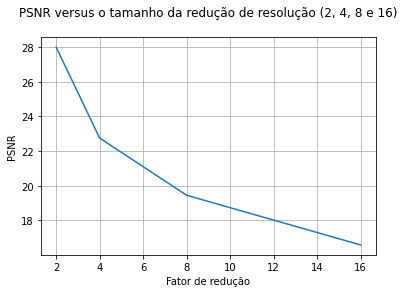

In [33]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

psnr_arr = []
img1 = cv2.imread('./lenna_cinza.png')
for n in arr_redu:
    img2 = cv2.imread('./NNMetodoCriado/fator_{}_retornar_original_img.png'.format(n))
    
    psnr_arr.append(calculate_psnr(img2, img1))

## PLOT
fig, ax = plt.subplots()
ax.plot(np.array(arr_redu) , np.array(psnr_arr) )

ax.set(xlabel='Fator de redução', ylabel='PSNR',
       title='PSNR versus o tamanho da redução de resolução (2, 4, 8 e 16)\n')
ax.grid()

plt.show()


**1.2** 

> Modifique a função desenvolvida em 1.1 de forma que ela utilize o algoritmo de interpolação **Bilinear**.  

> Novamente, utilize o seu programa para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16.  Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original.  Visualize todas as imagens obtidas, comente sobre as diferenças de qualidade  e calcule o PSNR entre a imagens originais e as imagens aumentadas (após a redução). 

> Bônus: Faça um gráfico dos valores de PSNR versus o tamanho da redução de resolução (2, 4, 8 e 16). 



In [34]:
def interpolacaoBilinear(image_path, n):
    image = cv2.imread(image_path)
    
    height, width = image.shape[0], image.shape[1] 
    
    height_n = int(height/n)
    width_n = int(width/n)
    
    resized = np.zeros(shape=(height_n, width_n, 3), dtype='uint8')
    
    
    for i in range(height_n):
        for j in range(width_n):

            x_l, y_l = math.floor(int(n * j)), math.floor(int(n * i))
            x_h, y_h = math.ceil(int(n * j)), math.ceil(int(n * i))

            x_weight = (n * j) - x_l
            y_weight = (n * i) - y_l

            a = image[y_l, x_l]
            b = image[y_l, x_h]
            c = image[y_h, x_l]
            d = image[y_h, x_h]

            pixel = a * (1 - x_weight) * (1 - y_weight) + b * x_weight * (1 - y_weight) + \
                      c * y_weight * (1 - x_weight) + d * x_weight * y_weight

            resized[i][j] = pixel
    
    if n > 1:
        cv2.imwrite("./BLMetodoCriado/fator_{}_img.png".format(n), resized)
    else:
        cv2.imwrite("./BLMetodoCriado/fator_{}_retornar_original_img.png".format(int(pow(n, -1))), resized)

for n in arr_redu:
    interpolacaoBilinear('./lenna_cinza.png', n)

Para retornar a imagem ao seu tamanho original basta escolher o n como frações

In [35]:
for n in arr_redu:
    interpolacaoBilinear('./BLMetodoCriado/fator_{}_img.png'.format(n), 1/n)

**1.3**

> Implemente a interpolação vizinho-mais-próximo e bilinear utilizando a função pronta do OpenCV (resize). Compare os resultados obtidos com a sua implementação e com a implementação do OpenCV. A comparação deve abranger o tempo de processamento das interpolações  e a PSNR da imagem. 

> Abaixo, é apresentado um exemplo da utilização da função resize do OpenCV e de um cronômetro para o código para cálculo do tempo de processamento.


In [36]:
def vizinhoMaisProximoCV2(img_path, n):
    img = cv2.imread(img_path)
    height, width = img.shape[0], img.shape[1] 
    resized = cv2.resize(img, (int(width/n), int(height/n)), 0, 0, interpolation = cv2.INTER_NEAREST)
    
    
    if n > 1:
        cv2.imwrite("./NNCV2/fator_{}_img.png".format(n), resized)
    else:
        cv2.imwrite("./NNCV2/fator_{}_retornar_original_img.png".format(int(pow(n, -1))), resized)

In [37]:
for n in arr_redu:
    vizinhoMaisProximoCV2('./lenna_cinza.png', n)

In [38]:
def interpolacaoBilinearCV2(img_path, n):
    img = cv2.imread(img_path)
    height, width = img.shape[0], img.shape[1] 
    resized = cv2.resize(img, (int(width/n), int(height/n)), 0, 0, interpolation = cv2.INTER_LINEAR)
    
    if n > 1:
        cv2.imwrite("./BLCV2/fator_{}_img.png".format(n), resized)
    else:
        cv2.imwrite("./BLCV2/fator_{}_retornar_original_img.png".format(int(pow(n, -1))), resized)

In [39]:
for n in arr_redu:
    interpolacaoBilinearCV2('./lenna_cinza.png', n)

### Comparação de tempo

In [40]:
#Documentação em: https://docs.python.org/3/library/time.html#time.time
# cronômetro

import time

for n in arr_redu:
    print('Redução de fator {}'.format(n))

    print('\n-------- Vizinho mais próximo --------\n')
    
    t0 = time.time()
    vizinhoMaisProximoCV2('./lenna_cinza.png', n)
    t1 = time.time()
    total = t1-t0
    print('Tempo do algoritmo da biblioteca CV2: ', total)
    
    t0 = time.time()
    vizinhoMaisProximo('./lenna_cinza.png', n)
    t1 = time.time()
    total = t1-t0
    print('Tempo do algoritmo criado: ', total)
    
    print('\n-------- Interpolação Bilinear --------\n')
    
    t0 = time.time()
    interpolacaoBilinearCV2('./lenna_cinza.png', n)
    t1 = time.time()
    total = t1-t0
    print('Tempo do algoritmo da biblioteca CV2: ', total)
    
    t0 = time.time()
    interpolacaoBilinear('./lenna_cinza.png', n)
    t1 = time.time()
    total = t1-t0
    print('Tempo do algoritmo criado: ', total)
    
    print('\n\n\n')

Redução de fator 2

-------- Vizinho mais próximo --------

Tempo do algoritmo da biblioteca CV2:  0.00867319107055664
Tempo do algoritmo criado:  0.08254313468933105

-------- Interpolação Bilinear --------

Tempo do algoritmo da biblioteca CV2:  0.008640050888061523
Tempo do algoritmo criado:  1.097114086151123




Redução de fator 4

-------- Vizinho mais próximo --------

Tempo do algoritmo da biblioteca CV2:  0.004154205322265625
Tempo do algoritmo criado:  0.022896766662597656

-------- Interpolação Bilinear --------

Tempo do algoritmo da biblioteca CV2:  0.004811763763427734
Tempo do algoritmo criado:  0.2879300117492676




Redução de fator 8

-------- Vizinho mais próximo --------

Tempo do algoritmo da biblioteca CV2:  0.0033380985260009766
Tempo do algoritmo criado:  0.007821798324584961

-------- Interpolação Bilinear --------

Tempo do algoritmo da biblioteca CV2:  0.00380706787109375
Tempo do algoritmo criado:  0.11024689674377441




Redução de fator 16

-------- Vizinh

### Comparação de PSNR

Para retornar a imagem ao seu tamanho original basta escolher o n como frações para os algortimos da biblioteca CV2

In [41]:
for n in arr_redu:
    vizinhoMaisProximoCV2('./BLMetodoCriado/fator_{}_img.png'.format(n), 1/n)
    interpolacaoBilinearCV2('./BLMetodoCriado/fator_{}_img.png'.format(n), 1/n)

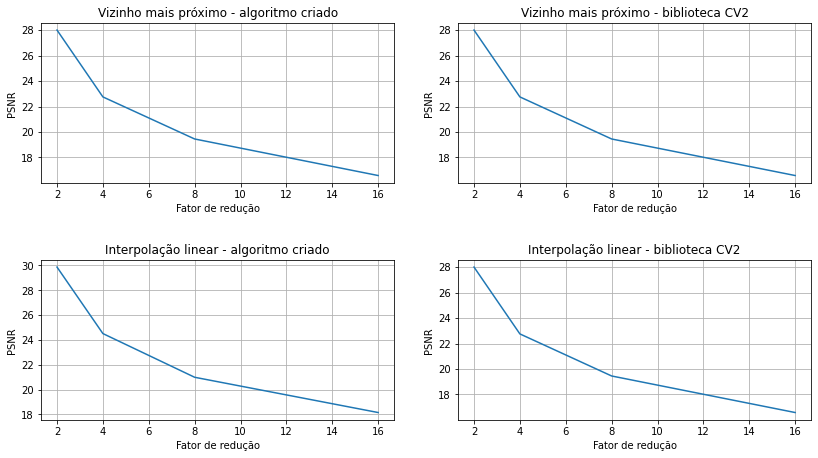

In [42]:
psnr_arr_NN = []
psnr_arr_NN_CV2 = []
psnr_arr_BL = []
psnr_arr_BL_CV2 = []

img1 = cv2.imread('./lenna_cinza.png')
for n in arr_redu:
    img2 = cv2.imread('./NNCV2/fator_{}_retornar_original_img.png'.format(n))
    psnr_arr_NN.append(calculate_psnr(img2, img1))
    
    img2 = cv2.imread('./NNMetodoCriado/fator_{}_retornar_original_img.png'.format(n))
    psnr_arr_NN_CV2.append(calculate_psnr(img2, img1))

    img2 = cv2.imread('./BLCV2/fator_{}_retornar_original_img.png'.format(n))
    psnr_arr_BL.append(calculate_psnr(img2, img1))
    
    img2 = cv2.imread('./BLMetodoCriado/fator_{}_retornar_original_img.png'.format(n))
    psnr_arr_BL_CV2.append(calculate_psnr(img2, img1))
    

## Gráfico comparando o PSNR por tamanho de redução de resolução com relação a imagem original
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))

ax1.plot(np.array(arr_redu) , np.array(psnr_arr_NN) )
ax2.plot(np.array(arr_redu) , np.array(psnr_arr_NN_CV2) )
ax3.plot(np.array(arr_redu) , np.array(psnr_arr_BL) )
ax4.plot(np.array(arr_redu) , np.array(psnr_arr_BL_CV2) )

ax1.set(xlabel='Fator de redução', ylabel='PSNR',
       title='Vizinho mais próximo - algoritmo criado')
ax1.grid()

ax2.set(xlabel='Fator de redução', ylabel='PSNR',
       title='Vizinho mais próximo - biblioteca CV2')
ax2.grid()

ax3.set(xlabel='Fator de redução', ylabel='PSNR',
       title='Interpolação linear - algoritmo criado')
ax3.grid()

ax4.set(xlabel='Fator de redução', ylabel='PSNR',
       title='Interpolação linear - biblioteca CV2')
ax4.grid()

fig.tight_layout(pad=3.0)
plt.show()

## **Problema 2**: Entrelaçamento (5 pontos)







> Uma câmera de vídeo entrelaçado transmite uma imagem de resolução completa transmitindo primeiro as linhas ́ımpares (em um primeiro quadro) e,  em seguida,  as linhas pares (em um segundo quadro).   A imagem de resolução completa pode ser recuperada combinando-se os quadros pares e ímpares – ver figura abaixo.

> Elabore um programa para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares. Considere, entretanto, que a câmera é defeituosa e que os defeitos só afetam os quadros pares. Nos quadros pares, as linhas de pixels aparecem deslocados pelo valor médio da linha (ou seja, o valor médio da linha foi subtraído das intensidades dos pixels da linha original). **O seu programa deve corrigir esta pertubação de forma que a imagem de resoluão completa reconstruída não apresente defeitos perceptíveis.**

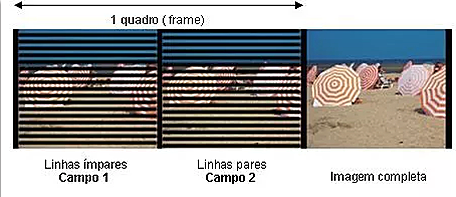

> Para resolver a questão, utilize as imagens em formato mat dos dois quadros (par e \'impar) estão nos endereços abaixo. O código para ler os arquivos mat é dado em seguida.  


*  [link campos pares](https://drive.google.com/file/d/1h4gsP4Wop17dthuh45NerdZJLCH-zt5U/view?usp=sharing)
*   [link campos ímpares](https://drive.google.com/file/d/1P6Z5ciRAh44jExv3sAKgo6WQZyq2it_z/view?usp=sharing)




Array da imagens de linhas pares:

Tipo =  float64 

Media dos valores =  -6.496390726949487e-16 

Valor Maximo =  188.27678571428572 

Valor Minimo =  -115.74285714285715 


Array da imagens de linhas ímpares:

Tipo =  uint8 

Media dos valores =  60.702597402597405 

Valor Maximo =  207 

Valor Minimo =  0 
 
Visualizando as matrizes


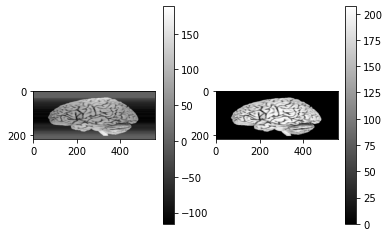

In [43]:
from scipy.io import loadmat
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_even = loadmat('even_rows.mat')
img_mateven = mat_even['even_corrupted_channel']

print('Array da imagens de linhas pares:\n')
print('Tipo = ', img_mateven.dtype,'\n')
print('Media dos valores = ', img_mateven.mean(),'\n')
print('Valor Maximo = ', img_mateven.max(),'\n')
print('Valor Minimo = ', img_mateven.min(),'\n\n')
# Dando uma olhada nos dados da matriz de linhas pares
# perceba que a matriz possui valores negativos
# logo, se for salvar o arquivo, é necessário tratar a possível presença de 
# valores negativos!

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_odd = loadmat('odd_rows.mat')
img_matodd = mat_odd['odd_channel']
# Dando uma olhada nos dados da matriz de linhas ímpares
print('Array da imagens de linhas ímpares:\n')
print('Tipo = ', img_matodd.dtype,'\n')
print('Media dos valores = ', img_matodd.mean(),'\n')
print('Valor Maximo = ', img_matodd.max(),'\n')
print('Valor Minimo = ', img_matodd.min(),'\n ')

# visualizando as imagens
print('Visualizando as matrizes')
plt.subplot(1,2,1)
plt.imshow(img_mateven, cmap=plt.cm.gray)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_matodd, cmap=plt.cm.gray)
plt.colorbar()


**2.1**   

>Elabore um programa para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares.

In [44]:
def questao21():
    even_rows, cols = img_mateven.shape
    odd_rows, cols = img_matodd.shape
    rows = even_rows + odd_rows

    image = np.zeros([rows, cols])

    for i in range(rows):
        for j in range(cols):
            if i%2 == 0:
                image[i][j] = img_mateven[int(i/2)][j]
            else:
                image[i][j] = img_matodd[int(i/2)][j]

    cv2.imwrite("./Questao2/generated_img_21.png", image)
questao21()

**2.2**   

>O seu programa deve corrigir esta pertubação de forma que a imagem de resoluão completa reconstruída não apresente defeitos perceptíveis.

In [45]:
def questao22():
    even_rows, cols = img_mateven.shape
    odd_rows, cols = img_matodd.shape
    rows = even_rows + odd_rows

    image = np.zeros([rows, cols])

    for i in range(1, rows):
        for j in range(cols):
            if i%2 == 0:
                image[i][j] = (img_mateven[int(i/2)-1][j] + img_mateven[int(i/2)][j])/2
            else:
                image[i][j] = img_matodd[int(i/2)][j]

    cv2.imwrite("./Questao2/generated_img_22.png", image)
questao22()